In [12]:
import os
print(os.getcwd())

/Users/heatherprescott/Data Science Working Portfolio/titanic_eda_projects/titanic_eda


# Assistant
Let's check for missing values in both the training and test datasets to identify which features need imputation:


Missing values in training dataset:
PassengerId           0
Survived              0
Pclass                0
Name                  0
Sex                   0
Age                 177
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               687
Embarked              2
Fare_binned           0
Fare_custom_bins     15
Fare_normalized       0
Fare_log              0
dtype: int64

Missing values in test dataset:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Percentage of missing values in training dataset:
PassengerId          0.000000
Survived             0.000000
Pclass               0.000000
Name                 0.000000
Sex                  0.000000
Age                 19.865320
SibSp                0.000000
Parch                0.000000
Ticket               

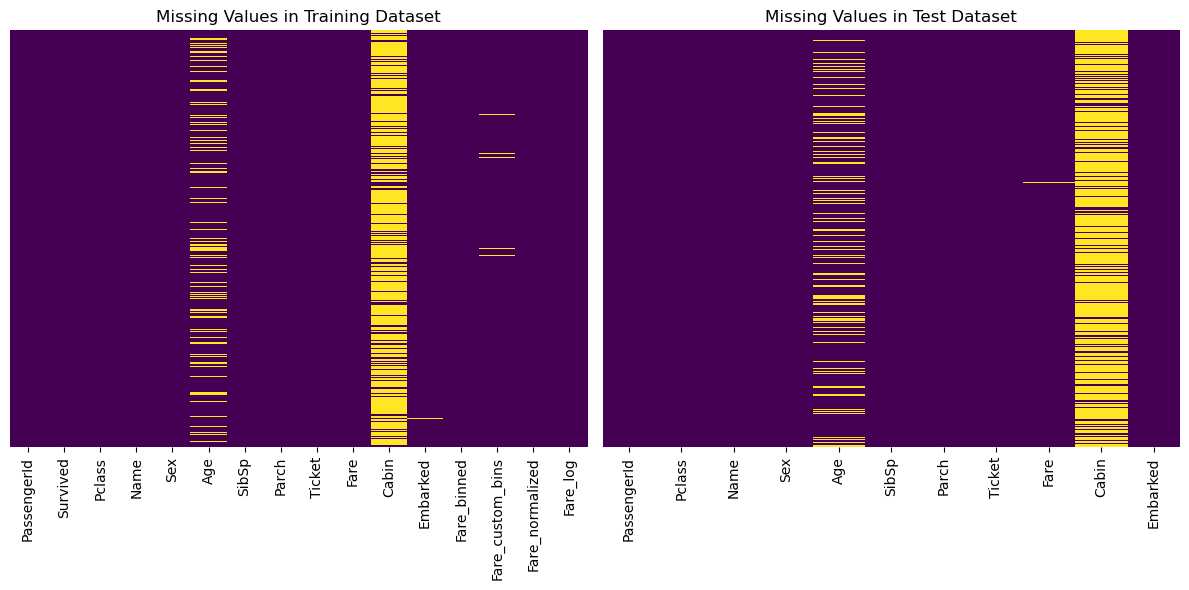

In [11]:
# Check for missing values in the training dataset
print("Missing values in training dataset:")
print(train_df.isnull().sum())

print("\nMissing values in test dataset:")
print(test_df.isnull().sum())

# Calculate percentage of missing values for better understanding
print("\nPercentage of missing values in training dataset:")
print(train_df.isnull().sum() / len(train_df) * 100)

print("\nPercentage of missing values in test dataset:")
print(test_df.isnull().sum() / len(test_df) * 100)

# Visualize missing values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values in Training Dataset')

plt.subplot(1, 2, 2)
sns.heatmap(test_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values in Test Dataset')

plt.tight_layout()
plt.show()


This code will:
1. Display the count of missing values for each column in both datasets
2. Calculate the percentage of missing values for each column
3. Create a visual representation of missing values using heatmaps

Based on the output, you'll be able to identify which features need imputation. Typically, for the Titanic dataset, you'll find missing values in:
- Age (moderate number of missing values)
- Cabin (large number of missing values)
- Embarked (few missing values)
- Fare (possibly a few in the test set)

# Assistant
Here are five insightful graphs for the Titanic dataset:

1. **Survival Rate by Sex and Class**: Bar chart showing survival rates across different passenger classes and genders.
   

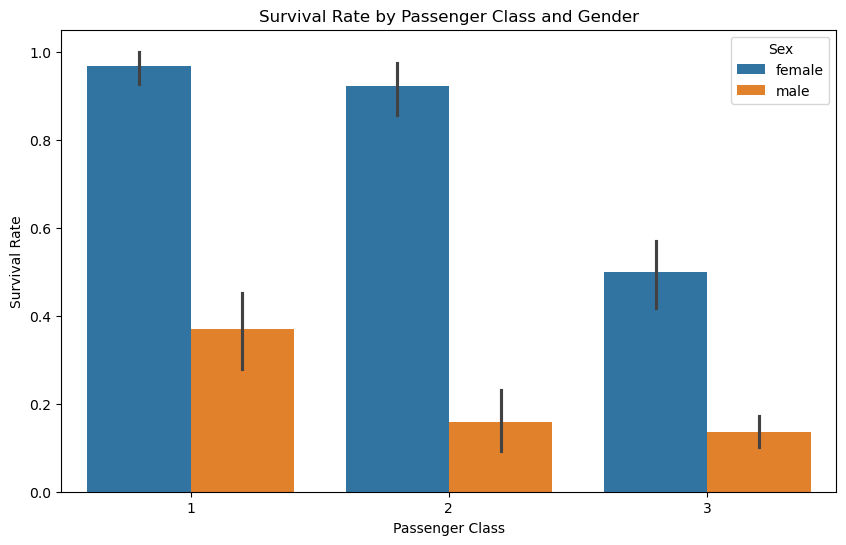

In [12]:
   import matplotlib.pyplot as plt
   import seaborn as sns
   
   plt.figure(figsize=(10, 6))
   sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_df)
   plt.title('Survival Rate by Passenger Class and Gender')
   plt.xlabel('Passenger Class')
   plt.ylabel('Survival Rate')
   plt.show()
   


2. **Age Distribution by Survival**: Histogram or KDE plot showing age distribution for survivors vs non-survivors.
   

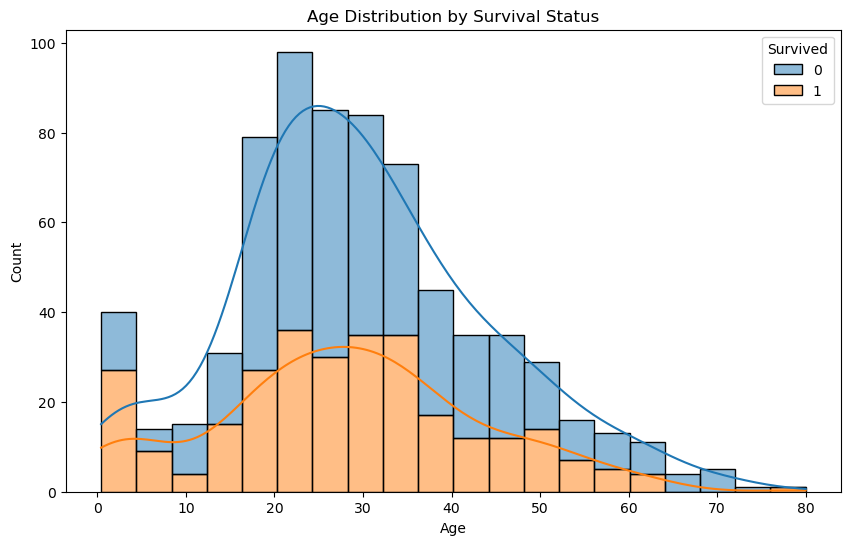

In [13]:
   plt.figure(figsize=(10, 6))
   sns.histplot(data=train_df, x='Age', hue='Survived', multiple='stack', kde=True)
   plt.title('Age Distribution by Survival Status')
   plt.xlabel('Age')
   plt.ylabel('Count')
   plt.show()
   


3. **Fare vs Age Scatter Plot**: Scatter plot with survival status indicated by color.
   

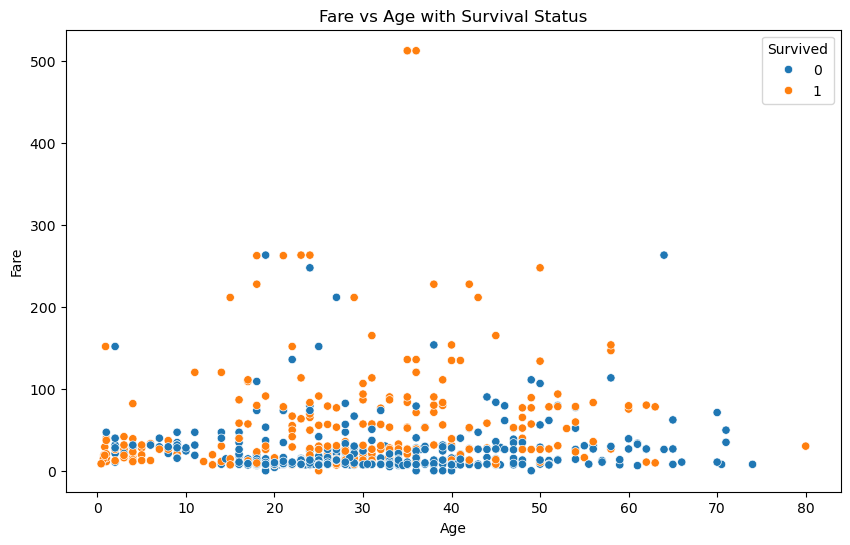

In [14]:
   plt.figure(figsize=(10, 6))
   sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_df)
   plt.title('Fare vs Age with Survival Status')
   plt.xlabel('Age')
   plt.ylabel('Fare')
   plt.show()
   


4. **Correlation Heatmap**: Visualize relationships between numerical variables.
   

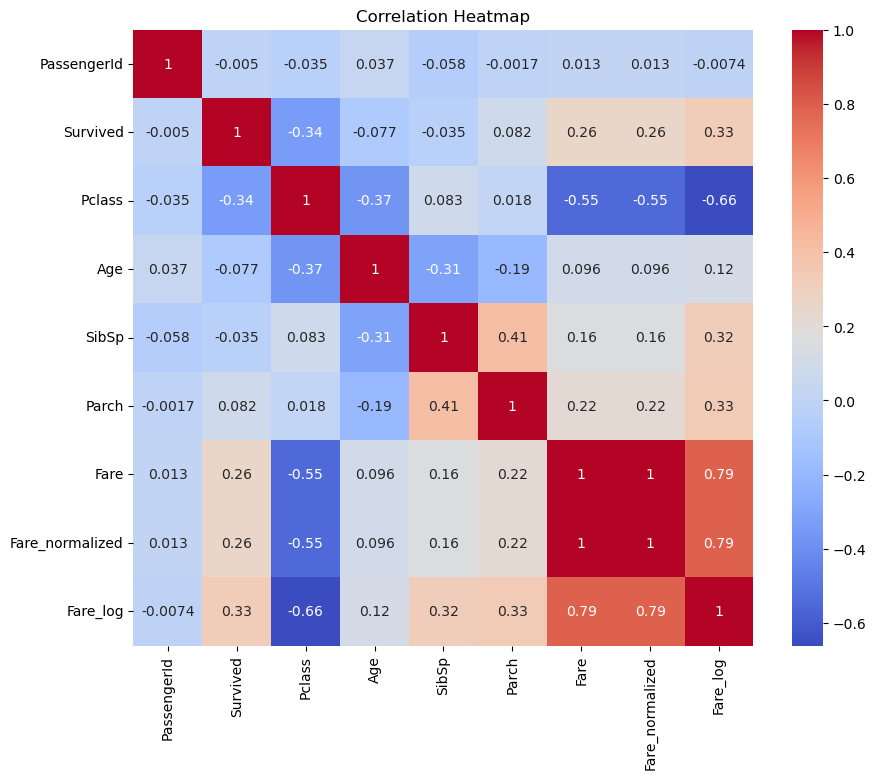

In [15]:
   plt.figure(figsize=(10, 8))
   numeric_df = train_df.select_dtypes(include=['int64', 'float64'])
   sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
   plt.title('Correlation Heatmap')
   plt.show()
   


5. **Survival Rate by Embarked Port**: Bar chart showing survival rates by port of embarkation.
   

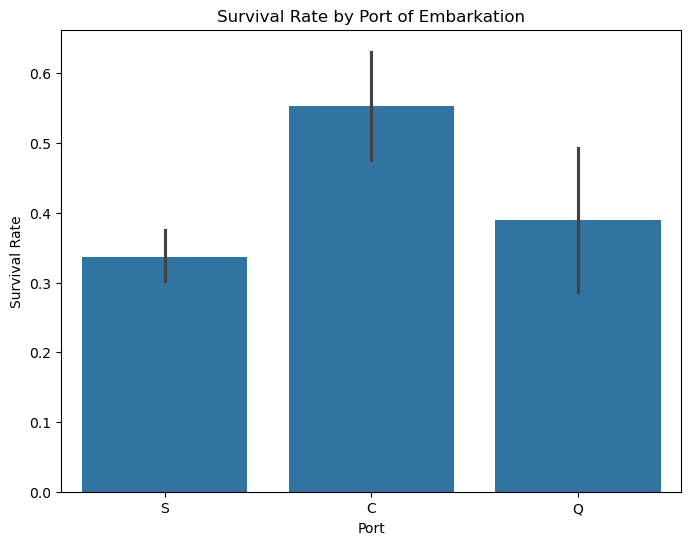

In [16]:
   plt.figure(figsize=(8, 6))
   sns.barplot(x='Embarked', y='Survived', data=train_df)
   plt.title('Survival Rate by Port of Embarkation')
   plt.xlabel('Port')
   plt.ylabel('Survival Rate')
   plt.show()
   

In [8]:
print(train_df.head())
print(test_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

Missing values per column:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Matplotlib is building the font cache; this may take a moment.


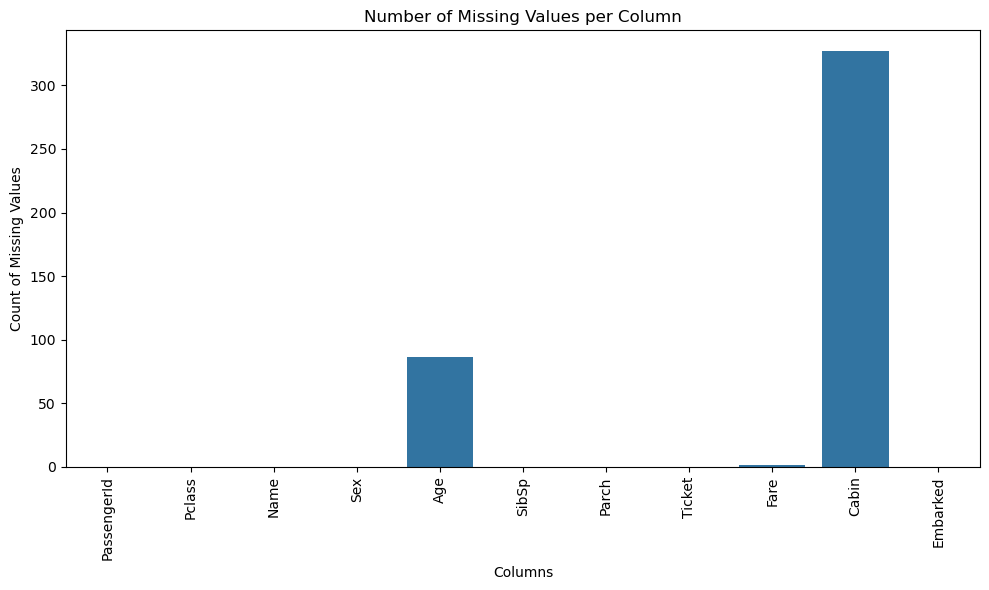


Columns that need imputation: ['Age', 'Fare', 'Cabin']

Percentage of missing values per column:
Age      20.574163
Fare      0.239234
Cabin    78.229665
dtype: float64


In [9]:
# Check for missing values in each column
missing_values = test_df.isnull().sum()

# Display the count of missing values for each column
print("Missing values per column:")
print(missing_values)

# Visualize the missing values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title('Number of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.tight_layout()
plt.show()

# Identify columns that need imputation (columns with missing values)
columns_to_impute = missing_values[missing_values > 0].index.tolist()
print("\nColumns that need imputation:", columns_to_impute)

# Calculate percentage of missing values
missing_percentage = (missing_values / len(test_df)) * 100
print("\nPercentage of missing values per column:")
print(missing_percentage[missing_percentage > 0])

# Assistant
To handle potential outliers in the 'Fare' column and improve model performance, I'll create fare bins and also show how to normalize the column. Here's the Python code:


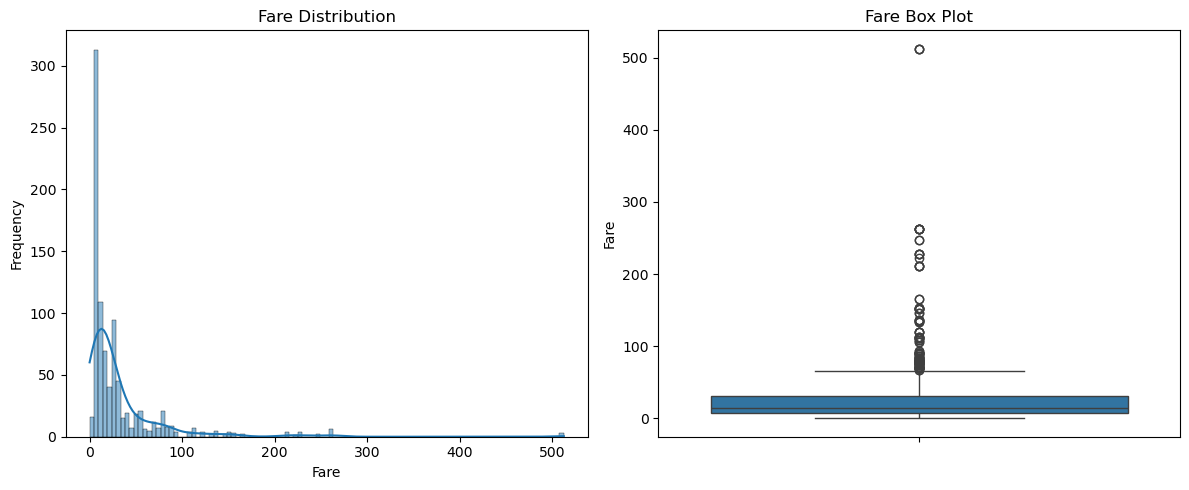

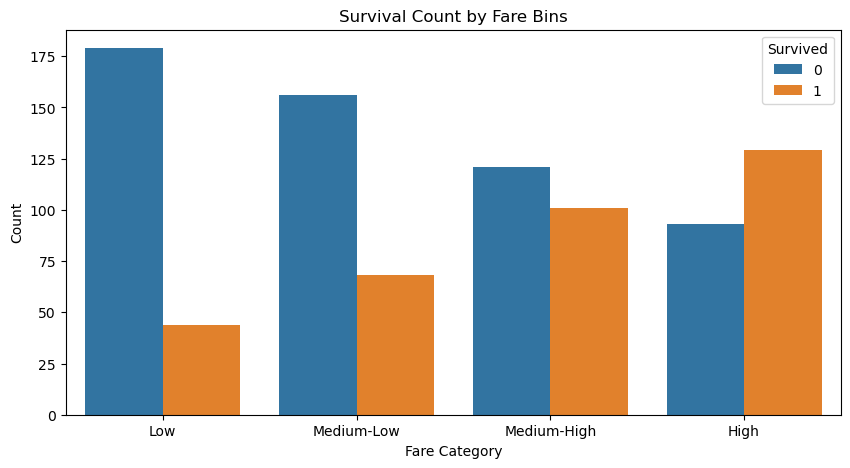

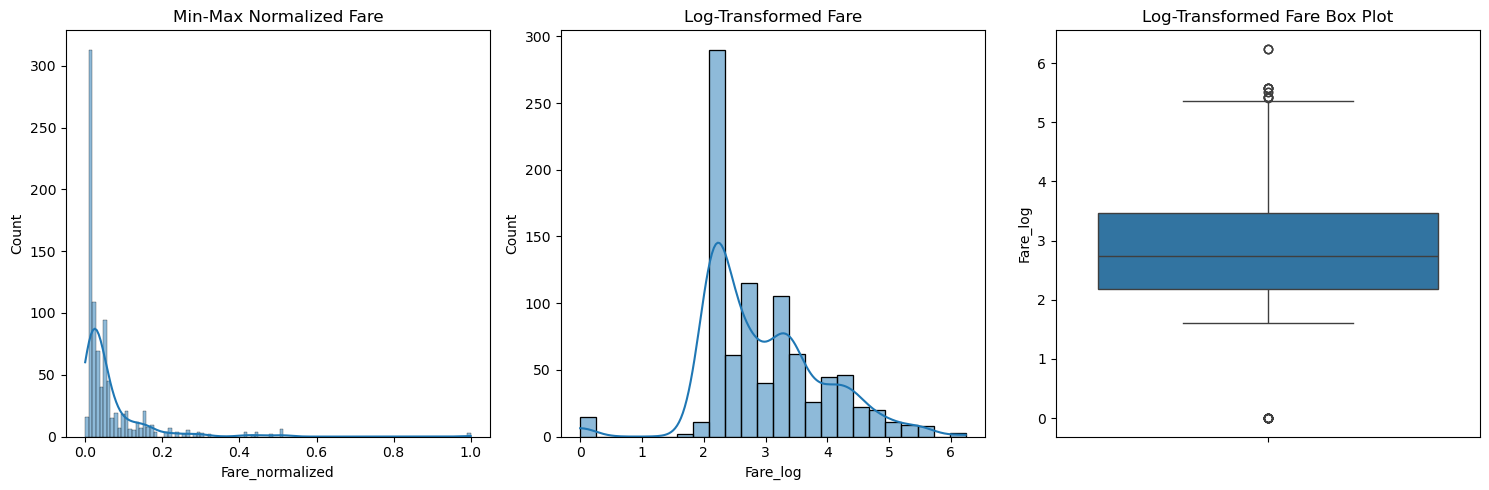

      Fare Fare_binned Fare_custom_bins  Fare_normalized  Fare_log
0   7.2500         Low              Low         0.014151  2.110213
1  71.2833        High             High         0.139136  4.280593
2   7.9250  Medium-Low       Medium-Low         0.015469  2.188856
3  53.1000        High             High         0.103644  3.990834
4   8.0500  Medium-Low       Medium-Low         0.015713  2.202765


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# First, let's visualize the current distribution of fares to identify outliers
plt.figure(figsize=(12, 5))

# Plot 1: Histogram of fare distribution
plt.subplot(1, 2, 1)
sns.histplot(train_df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')

# Plot 2: Box plot to identify outliers
plt.subplot(1, 2, 2)
sns.boxplot(y=train_df['Fare'])
plt.title('Fare Box Plot')
plt.ylabel('Fare')
plt.tight_layout()
plt.show()

# Method 1: Create fare bins (quartiles)
# Create a new column with binned fares
train_df['Fare_binned'] = pd.qcut(train_df['Fare'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Visualize the binned fares
plt.figure(figsize=(10, 5))
sns.countplot(x='Fare_binned', hue='Survived', data=train_df)
plt.title('Survival Count by Fare Bins')
plt.xlabel('Fare Category')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

# Method 2: Create custom fare bins
fare_bins = [0, 7.91, 14.45, 31, 600]  # Based on quartiles and max value
fare_labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
train_df['Fare_custom_bins'] = pd.cut(train_df['Fare'], bins=fare_bins, labels=fare_labels)

# Method 3: Normalize the fare column
# Min-Max Scaling
train_df['Fare_normalized'] = (train_df['Fare'] - train_df['Fare'].min()) / (train_df['Fare'].max() - train_df['Fare'].min())

# Log transformation to handle skewness (adding 1 to avoid log(0))
train_df['Fare_log'] = np.log1p(train_df['Fare'])

# Visualize the transformed fare columns
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(train_df['Fare_normalized'], kde=True)
plt.title('Min-Max Normalized Fare')

plt.subplot(1, 3, 2)
sns.histplot(train_df['Fare_log'], kde=True)
plt.title('Log-Transformed Fare')

plt.subplot(1, 3, 3)
sns.boxplot(y=train_df['Fare_log'])
plt.title('Log-Transformed Fare Box Plot')

plt.tight_layout()
plt.show()

# Display the first few rows with the new columns
print(train_df[['Fare', 'Fare_binned', 'Fare_custom_bins', 'Fare_normalized', 'Fare_log']].head())

# Apply the same transformations to the test set if needed
# Make sure to use the same bin edges and min/max values from the training set


This code provides three approaches to handle the 'Fare' column:

1. **Quartile-based binning**: Creates 4 equal-sized bins based on fare distribution
2. **Custom binning**: Creates bins with custom thresholds
3. **Normalization techniques**:
   - Min-Max scaling to bring values between 0 and 1
   - Log transformation to reduce skewness and handle outliers

The visualizations help understand the distribution before and after transformation. Choose the method that works best for your model based on the visualizations and model performance.